<a href="https://colab.research.google.com/github/srikanth2102/FIDELITY_STOCK_PREDICTION/blob/main/Fidelity_Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **FIDELITY STOCK PRICE PREDICTION**

## ***ESSENTIAL LIBRARIES***

In [1]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [2]:
from google.colab import files
uploaded = files.upload()

Saving FNF.csv to FNF.csv


In [5]:
# reading the csv file
data = pd.read_csv('FNF.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,01-08-2016,27.234657,27.386282,27.191336,27.234657,23.282555,806486
1,02-08-2016,27.032492,27.277979,26.974730,27.119135,23.183796,1308410
2,03-08-2016,26.714802,26.895308,26.036100,26.505415,22.659138,3187301
3,04-08-2016,26.577618,26.642599,26.332130,26.505415,22.659138,1813796
4,05-08-2016,26.505415,26.758123,26.231047,26.310469,22.492477,1613941


In [6]:
# converting Date column to time format
data['Date'] = pd.to_datetime(data.Date, format='%d-%m-%Y')
data.index = data['Date']

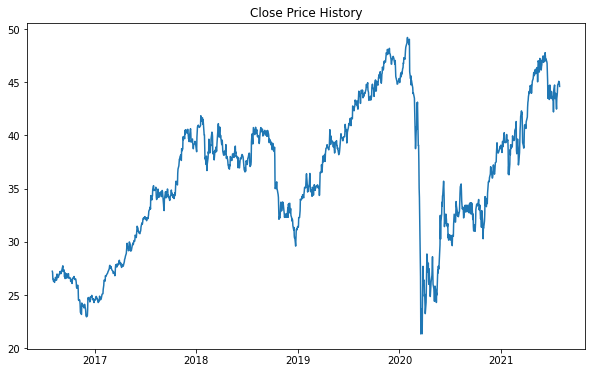

In [7]:
# plotting the close price of the fidelity stock
plt.figure(figsize=(10,6))
plt.plot(data['Close'])
plt.title('Close Price History')
plt.show()

## ***MOVING AVERAGE***

In [8]:
# sorting the data in asecnding order
data = data.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(data)),columns=['Date', 'Close'])

for i in range(0,len(data)):
     new_data['Date'][i] = data['Date'][i]
     new_data['Close'][i] = data['Close'][i]

# we shouldnt split the data randomly, it will destroy the time feature. In this we take last year data for validation

# splitting into train and validation
train = new_data[:987]
valid = new_data[987:]

# shapes of training set
print('\n Shape of training set:')
print(train.shape)

# shapes of validation set
print('\n Shape of validation set:')
print(valid.shape)

# In the next step, we will create predictions for the validation set and check the RMSE using the actual values.
# making predictions
preds = []
for i in range(0,valid.shape[0]):
    a = train['Close'][len(train)-150+i:].sum() + sum(preds)
    b = a/150
    preds.append(b)

# checking the results (RMSE value)
rms=np.sqrt(np.mean(np.power((np.array(valid['Close'])-preds),2)))
print('\n RMSE value on validation set:')
print(rms)


 Shape of training set:
(987, 2)

 Shape of validation set:
(272, 2)

 RMSE value on validation set:
8.831070272321131


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


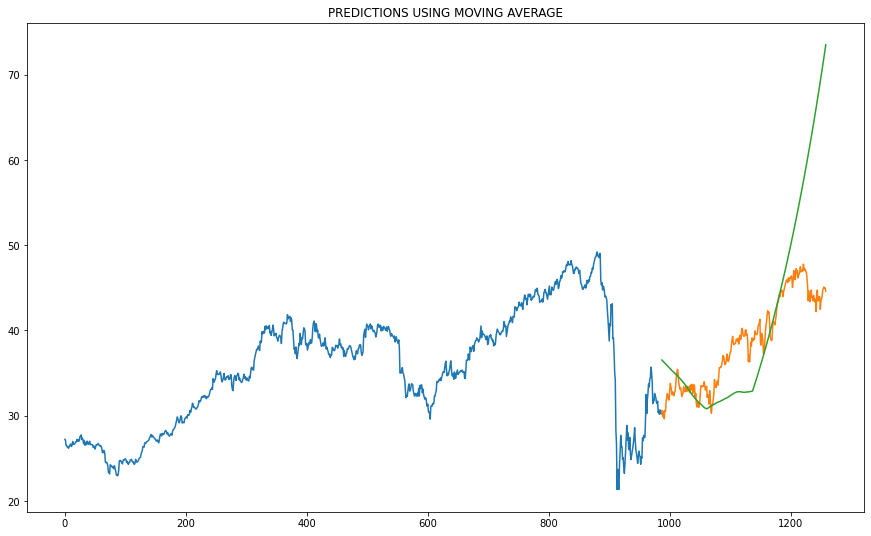

In [9]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.figure(figsize=(15,9))
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.title('PREDICTIONS USING MOVING AVERAGE')
plt.show()

It is clear from the plot that the predictions using moving average isnt that accurate.

## ***AUTO ARIMA***

In [10]:
! pip install pmdarima

     |████████████████████████████████| 1.5 MB 4.2 MB/s 
     |████████████████████████████████| 9.5 MB 11.7 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [12]:
from pmdarima import auto_arima

data = data.sort_index(ascending=True, axis=0)

train = data[:987]
valid = data[987:]

training = train['Close']
validation = valid['Close']

model = auto_arima(training, start_p=1, start_q=1,max_p=3, max_q=3, m=12,start_P=0, seasonal=True,d=1, D=1, trace=True,error_action='ignore',suppress_warnings=True)
model.fit(training)

forecast = model.predict(n_periods=272)
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=3.65 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=2486.461, Time=0.08 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=2172.568, Time=0.58 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=2.16 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=2488.185, Time=0.10 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=2078.183, Time=1.02 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=6.11 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=2.26 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=2076.390, Time=0.77 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=2170.577, Time=0.30 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=4.61 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=1.56 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=2078.233, Time=1.24 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=2077.475, Time=2.20 sec
 ARIMA(0,1,0)(2,1,0)[12] intercept   : AIC=2078.3

In [13]:
rms=np.sqrt(np.mean(np.power((np.array(valid['Close'])-np.array(forecast['Prediction'])),2)))
rms

2.3772423394106452

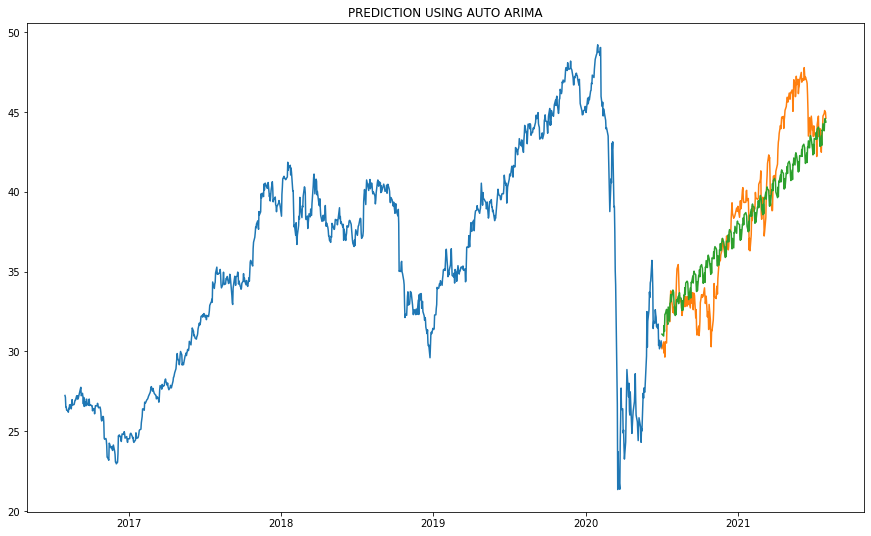

In [14]:
#plot
plt.figure(figsize=(15,9))
plt.plot(train['Close'])
plt.plot(valid['Close'])
plt.title('PREDICTION USING AUTO ARIMA')
plt.plot(forecast['Prediction'])

The predictions made using the AUTO ARIMA captures the trend of the stock but the predictions can be improved.

## ***LSTM MODEL***

In [15]:
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

#creating dataframe
data = data.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(data)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

#setting index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

#creating train and test sets
dataset = new_data.values

train = dataset[0:987,:]
valid = dataset[987:,:]

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=150, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=100))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

#predicting 246 values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

927/927 - 51s - loss: 0.0055


In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 150)           91200     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               100400    
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 191,701
Trainable params: 191,701
Non-trainable params: 0
_________________________________________________________________


In [17]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms

0.9556013187017461

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


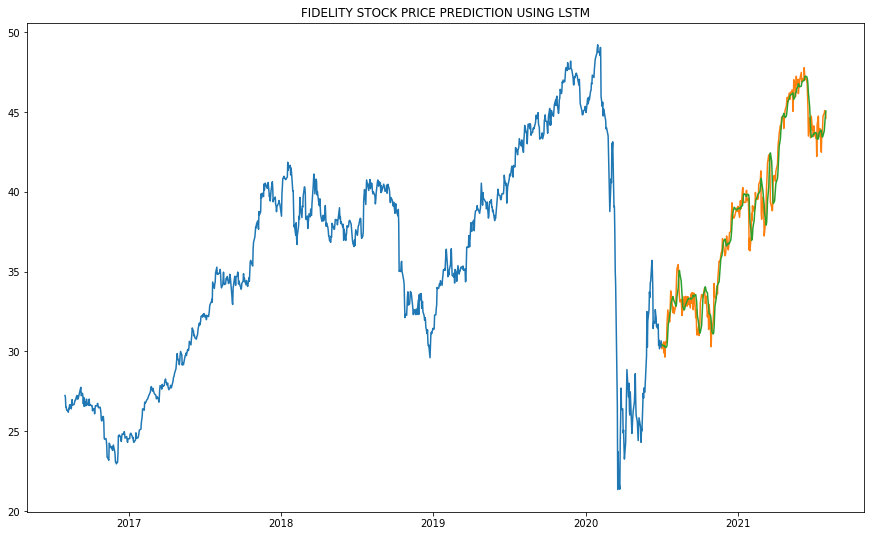

In [18]:
#for plotting
train = new_data[:987]
valid = new_data[987:]
valid['Predictions'] = closing_price

plt.figure(figsize=(15,9))

plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.title('FIDELITY STOCK PRICE PREDICTION USING LSTM')

plt.show()

From this plot we can see that LSTM model captures the overall trend as well as the seasonality of the stock price of Fidelity National Financial very well.